In [107]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [53]:
df = pd.read_csv("Auto.csv")
print(df.head())
print("\nDimensions of the data frame: ", df.shape)
print("\nDescribe mpg, weight, and year columns\n", df.loc[:,["mpg", "weight", "year"]].describe())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions of the data frame:  (392, 9)

Describe mpg, weight, and year columns
               mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.0

In [54]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


In [55]:
df.cylinders = df.cylinders.astype("category").cat.codes
df.origin = df.origin.astype("category").cat.codes
print(df.head())
print(df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          4         307.0         130    3504          12.0  70.0   
1  15.0          4         350.0         165    3693          11.5  70.0   
2  18.0          4         318.0         150    3436          11.0  70.0   
3  16.0          4         304.0         150    3433          12.0  70.0   
4  17.0          4         302.0         140    3449           NaN  70.0   

   origin                       name  
0       0  chevrolet chevelle malibu  
1       0          buick skylark 320  
2       0         plymouth satellite  
3       0              amc rebel sst  
4       0                ford torino  
mpg             float64
cylinders          int8
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin             int8
name             object
dtype: object


In [56]:
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
(389, 9)


In [57]:
df["mpg_high"] = df.mpg > np.mean(df.mpg)
df.mpg_high = df.mpg_high.astype("category").cat.codes
df = df.drop(["mpg","name"], axis=1)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,0,0
1,4,350.0,165,3693,11.5,70.0,0,0
2,4,318.0,150,3436,11.0,70.0,0,0
3,4,304.0,150,3433,12.0,70.0,0,0
6,4,454.0,220,4354,9.0,70.0,0,0


Despite being defined by the average value, mpg_high is not a 50-50 split of the data. This implies its slightly skewed to lower values.

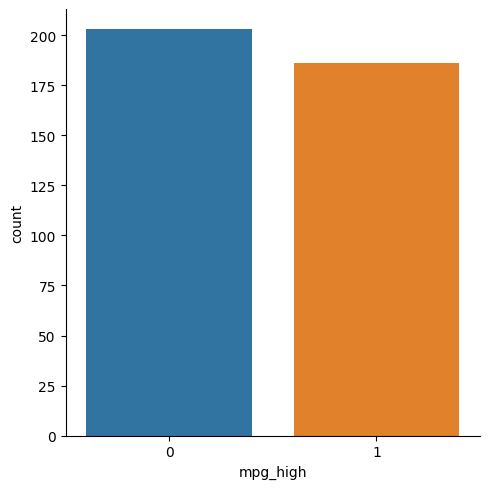

In [58]:
sb.catplot(x="mpg_high", kind="count", data=df)

Bigger cars tend to be less gas efficient.

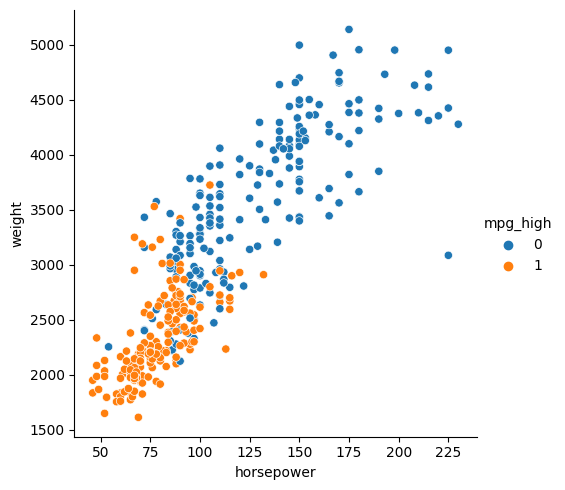

In [59]:
sb.relplot(x="horsepower",y="weight", hue="mpg_high", data=df)

Smaller cars tend to be more gas efficient.

<AxesSubplot: xlabel='mpg_high', ylabel='weight'>

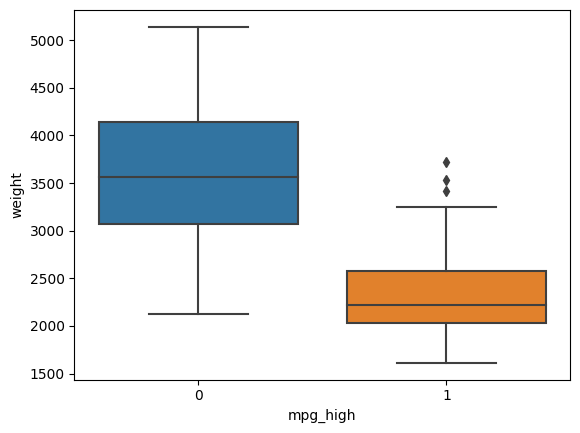

In [60]:
sb.boxplot(x="mpg_high", y="weight", data=df)

In [61]:
X = df.loc[:,df.columns != "mpg_high"]
y = df.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)

(311, 7)
(78, 7)


In [62]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.9035369774919614

In [63]:
pred = lr.predict(X_test)

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train,y_train)

1.0

In [66]:
pred = dt.predict(X_test)

In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.86      0.89      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



[Text(0.6433823529411765, 0.9444444444444444, 'X[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'X[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'X[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'X[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'X[0] <= 0.5\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'X[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'X[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'X[3

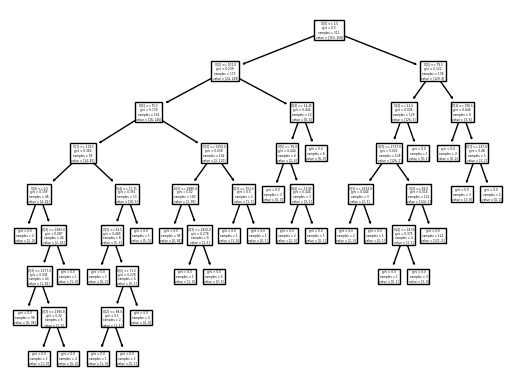

In [68]:
plot_tree(dt)

In [71]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
nn1 = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(10,), max_iter=1000, random_state=1234)
nn1.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1234,
              solver='lbfgs')

In [104]:
pred = nn1.predict(X_test_scaled)

In [108]:
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.83      0.89      0.86        28

    accuracy                           0.90        78
   macro avg       0.89      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78



array([[45,  5],
       [ 3, 25]], dtype=int64)

In [130]:
nn2 = MLPClassifier(solver="sgd", hidden_layer_sizes=(3,2), max_iter=1000, random_state=1234)
nn2.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=1000, random_state=1234,
              solver='sgd')

In [131]:
pred = nn2.predict(X_test_scaled)

In [132]:
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        50
           1       0.74      0.89      0.81        28

    accuracy                           0.85        78
   macro avg       0.83      0.86      0.84        78
weighted avg       0.86      0.85      0.85        78



array([[41,  9],
       [ 3, 25]], dtype=int64)

The first neural network had many more nodes and more accurately learned the edge cases, while the second neural network likely underfit the data.

The logistic regression performed equal to or better than all the other models in this case. This is likely due to the other algorithms overfitting the training data causing errors in the test data's outliers. 

Using sklearn was more intuitive to me than R because I have prior experience in python. Using RStudio also helped prepare me for the differences between python and python notebooks.